# 1. Obrada i prikaz podataka
U ovom izvješću biti će učitani podatci, te objašnjena karakteristika baze podataka. Uz to biti će i izračunati medijani određenih značajki. Nad podatcima biti će napravljena provjera za "outliner" podatcima. Na kraju će i grafički biti prikzani podatci.

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px

## 1.1 Učitavanje podataka

In [179]:
dir = "Data"

#dict students sadrži dataframove sa svakog testa za tog studenta
students ={}

for s in os.listdir(dir):
    dir2 = os.path.join(dir, s)
    exams = {}
    for exam in os.listdir(dir2):
        dir3 = os.path.join(dir2, exam)
        
        # Get CSV files list from a folder
        csv_files = {}
        for filename in os.listdir(dir3):
            df_list = []
            f = os.path.join(dir3, filename)
            if f.endswith(".csv") and os.stat(f).st_size != 0 and filename != 'tags.csv':
                name = os.path.splitext(filename)[0] 
                if name == "ACC":    
                    csv_files[f] = ["ACCx","ACCy","ACCz"]
                elif name == "IBI":
                    csv_files[f] = ["IBI_time","IBI_duration"]
                else:
                    csv_files[f] = [name]
        # Read each CSV file into DataFrame
        # This creates a list of dataframes
        df_list = (pd.read_csv(k, names = v ,skiprows=1) for k,v in csv_files.items())
        df_list=list(df_list)
        exams[exam]=df_list
    students[s]=exams
    

Objašnjenja značajki:

ACC
Data from 3-axis accelerometer sensor. The accelerometer is configured to measure acceleration in the range [-2g, 2g]. Therefore the unit in this file is 1/64g.
Data from x, y, and z axis are respectively in first, second, and third column.

BVP
Data from photoplethysmograph.

EDA
Data from the electrodermal activity sensor expressed as microsiemens (μS).

HR
Average heart rate extracted from the BVP signal.The first row is the initial time of the session expressed as unix timestamp in UTC.

IBI
Time between individuals heart beats extracted from the BVP signal.
No sample rate is needed for this file.
The first column is the time (respect to the initial time) of the detected inter-beat interval expressed in seconds (s).
The second column is the duration in seconds (s) of the detected inter-beat interval (i.e., the distance in seconds from the previous beat).

TEMP
Data from temperature sensor expressed degrees on the Celsius (°C) scale.

Ove značajke uvije će biti u listi na istoj poziciji te će svaka imati svoj dataframe.


In [16]:
#primjer ispisa svih podataka za studenta1 sa finalnog ispita

for X in students["S1"]["Final"]:
    print(X.head())
    print(X.shape)
    print(X.describe())

   ACCx  ACCy  ACCz
0  32.0  32.0  32.0
1  -3.0  65.0   6.0
2  -3.0  65.0   6.0
3  -3.0  65.0   6.0
4  -3.0  65.0   6.0
(748687, 3)
                ACCx           ACCy           ACCz
count  748687.000000  748687.000000  748687.000000
mean      -15.147633      -2.671848       0.865076
std        33.683241      30.311677      42.862509
min      -128.000000    -128.000000    -128.000000
25%       -42.000000      -9.000000     -32.000000
50%        -7.000000       1.000000      -1.000000
75%         0.000000       6.000000      40.000000
max       127.000000     127.000000     127.000000
    BVP
0  64.0
1  -0.0
2  -0.0
3  -0.0
4  -0.0
(1497376, 1)
                BVP
count  1.497376e+06
mean   3.232321e-04
std    4.479242e+01
min   -1.631490e+03
25%   -3.470000e+00
50%    2.000000e-02
75%    3.350000e+00
max    2.659680e+03
        EDA
0  4.000000
1  0.000000
2  0.005125
3  0.020501
4  0.021783
(93583, 1)
                EDA
count  93583.000000
mean       0.102966
std        0.084358
min  

      HR
0   1.00
1  50.00
2  53.50
3  61.00
4  91.25
(11993, 1)
                 HR
count  11993.000000
mean     108.247747
std       28.119918
min        1.000000
25%       87.080000
50%      104.520000
75%      122.970000
max      205.020000


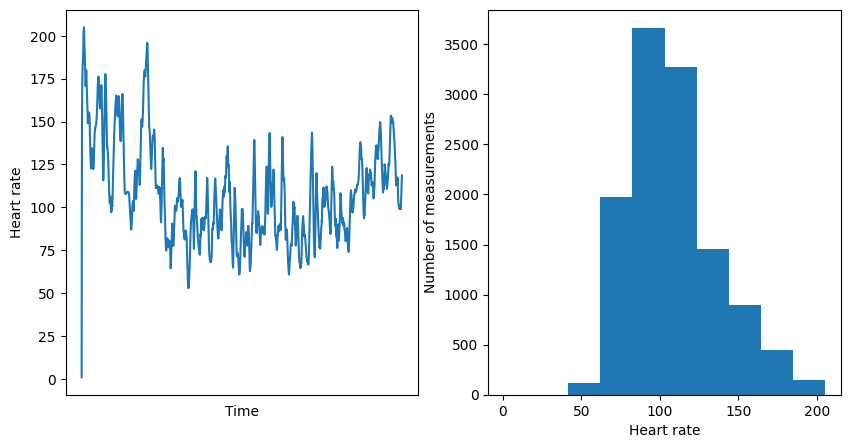

In [166]:
#primjer ispisa otkucaja srca za studenta5 na Midterm 1
X = pd.DataFrame(students["S5"]["Midterm 1"][3])
print(X.head())
print(X.shape)
print(X.describe())

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Heart rate')
ax[0].set_xticks([])
ax[0].plot(X)

ax[1].set_xlabel('Heart rate')
ax[1].set_ylabel('Number of measurements')
ax[1].hist(X)
plt.show()

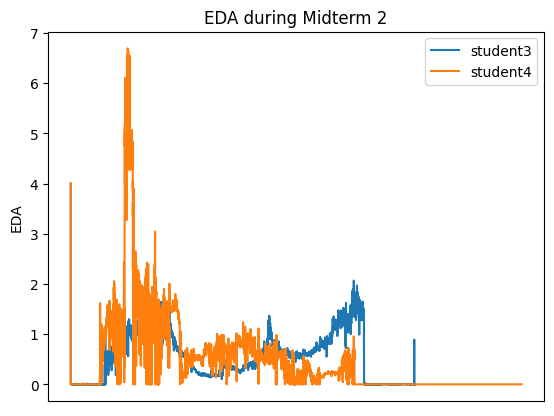

In [168]:
#comparing the EDA values between student3 and student4
X_tmp1 = pd.DataFrame(students["S3"]["Midterm 2"][2])
X_tmp2 = pd.DataFrame(students["S4"]["Midterm 2"][2])


plt.xticks([])
plt.ylabel('EDA')
plt.title('EDA during Midterm 2')
plt.plot(X_tmp1, label ='student3')
plt.plot(X_tmp2, label ='student4')
plt.legend(loc='best')
plt.show()

    TEMP   TEMP   TEMP   TEMP   TEMP   TEMP   TEMP   TEMP   TEMP   TEMP
0   4.00   4.00   4.00   4.00   4.00   4.00   4.00   4.00   4.00   4.00
1  22.51  22.11  22.63  22.07  21.81  22.23  22.39  22.21  22.61  22.23
2  22.51  22.11  22.63  22.07  21.81  22.23  22.39  22.21  22.61  22.23
3  22.51  22.11  22.63  22.07  21.81  22.23  22.39  22.21  22.61  22.23
4  22.51  22.11  22.63  22.07  21.81  22.23  22.39  22.21  22.61  22.23
(50721, 10)
               TEMP          TEMP          TEMP          TEMP          TEMP  \
count  44713.000000  46745.000000  47937.000000  48849.000000  46777.000000   
mean      26.417878     26.022517     28.694296     26.729659     25.404627   
std        2.217262      2.280612      4.597918      2.819843      1.796042   
min        4.000000      4.000000      4.000000      4.000000      4.000000   
25%       23.590000     23.170000     23.470000     23.470000     23.770000   
50%       27.590000     27.010000     29.170000     27.670000     26.490000   
75%

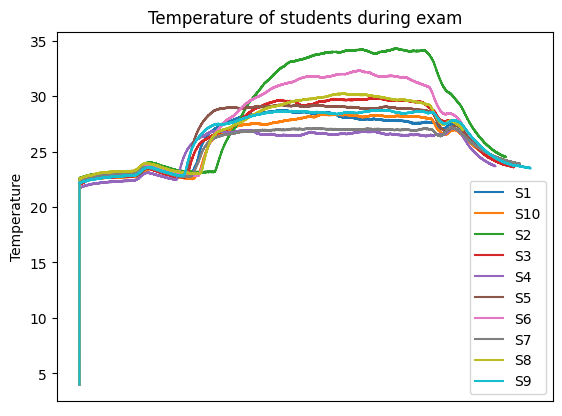

In [181]:
#comparing temperatures from all 10 students on Midterm 1 exam
X_tmp_lst=[]
labels=[]
for k,v in students.items():
    labels.append(k)
    X_tmp_lst.append(v["Midterm 1"][5])
X_tmp = pd.concat(X_tmp_lst, axis = 1)

print(X_tmp.head())
print(X_tmp.shape)
print(X_tmp.describe())


plt.xticks([])
plt.ylabel('Temperature')
plt.title('Temperature of students during exam')
plt.plot(X_tmp, label = labels)
plt.legend(loc='best')
plt.show()

{'Midterm 1': [48793, 50089, 50481, 47426, 48359, 50221, 49497, 47445, 48335, 48808], 'Midterm 2': [64807, 65716, 65726, 50847, 50556, 43592, 66739, 71853, 69449, 50242], 'Final': [48577, 41402, 48166, 51099, 51394, 46417, 48198, 21142, 50688, 50144]}


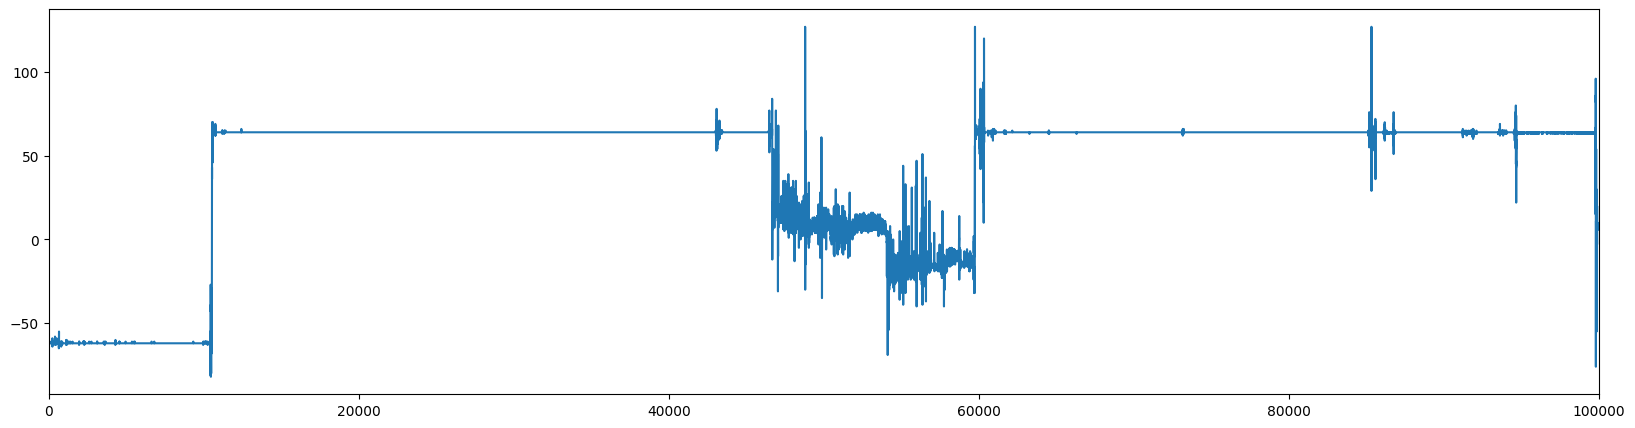

In [77]:
#dobivanje početaka ispita 

X = pd.DataFrame(students["S1"]["Midterm 1"][0])
X = X.iloc[1:100000]
plt.figure(figsize=(20,5))
plt.xlim(0,100000)
plt.plot(X.ACCy)

def get_exam_begginings(students):
    
    exam_begginings={"Midterm 1":[],"Midterm 2":[], "Final":[]}
    for student in students.values():
        for exam,X in student.items():

            X=X[0]
            X = X.iloc[1:100000]
            exam_s=[]
            br=0
            for e in (X['ACCy'].diff()):
                if(abs(e)>100):
                    exam_s.append(br)
                br+=1
            exam_begginings[exam].append(min(exam_s, key=lambda x:abs(x-50000)))
    return exam_begginings

print(get_exam_begginings(students))

In [94]:
from scipy.signal import butter, filtfilt

def lowpass_butter_filter(data, cutoff, sampling_frequency, order=4):
    nyq = 0.5 * sampling_frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data, axis=0)

    return pd.DataFrame(y, columns=[data.columns[0]])

In [75]:
#cutoff frekvencije uzete iz tablice u članku

cutoff_freq = pd.DataFrame(
    {
        'Midterm 1': [0.002, 0.002, 0.0002, 0.002, 0.001, 0.002, 0.001, 0.0002, 0.002, 0.002],
        'Midterm 2': [0.002, 0.001, 0.0002, 0.002, 0.001, 0.002, 0.0002, 0.002, 0.002, 0.002],
        'Final': [0.002, 0.002, 0.001, 0.002, 0.001, 0.002, 0.0002, 0.002, 0.002, 0.002],
    }
)
print(cutoff_freq)

   Midterm 1  Midterm 2   Final
0     0.0020     0.0020  0.0020
1     0.0020     0.0010  0.0020
2     0.0002     0.0002  0.0010
3     0.0020     0.0020  0.0020
4     0.0010     0.0010  0.0010
5     0.0020     0.0020  0.0020
6     0.0010     0.0002  0.0002
7     0.0002     0.0020  0.0020
8     0.0020     0.0020  0.0020
9     0.0020     0.0020  0.0020


In [120]:
#dobivanje traženih 9 značajki potrebnih za KNN i mjesta na kojima počinju EDA_očitanja
import math
def get_features_and_eda(students,  cutoff_freq,  exam_begginings, time_window=[5,15,30]):
    features = {'Final':{5:[],15:[], 30:[]},'Midterm 1':{5:[],15:[], 30:[]},'Midterm 2':{5:[],15:[], 30:[]}}
    eda_samples = {'Final':[],'Midterm 1':[],'Midterm 2':[]}
    br=0
    for student in students.values():
        for exam,X in student.items():
            
            X_ACC=X[0]['ACCy']
            X_EDA=X[2]
            
            freq_ACC = X_ACC.iloc[0]
            freq_EDA = X_EDA.iloc[0]
            
            
            exam_start = exam_begginings[exam][br]
            
            time_ACC = exam_start / freq_ACC
            
            eda_remove = math.floor(time_ACC * freq_EDA)
            
            eda_samples[exam].append(eda_remove)
            
            X_EDA = X_EDA.iloc[eda_remove:]
            
            X_EDA = lowpass_butter_filter(X_EDA, cutoff_freq[exam][br], 4.000) 
            
            data =[]
            for j in X_EDA.values:
                data.append (j)
        
            for e in time_window:
                rng = e*60*4
                
                first_data = data[0:rng]
                second_data = data[int(len(data)/2) - int(rng/2) : int(len(data)/2) + int(rng/2)]
                third_data = data[len(data) - rng : len(data)]
                
                mi1 = np.mean (first_data)
                mi2 = np.mean (second_data)
                mi3 = np.mean (third_data)

                sigma1 = np.var (first_data)
                sigma2 = np.var (second_data)
                sigma3 = np.var (third_data)

                ro = mi2 / (mi1 + mi3)

                diff = np.array(third_data) - np.array(first_data)
                mi_diff = np.mean (diff)
                sigma_diff = np.var (diff)
                
                x = [mi1, mi2, mi3, sigma1, sigma2, sigma3, ro, mi_diff, sigma_diff]
                features[exam][e].append(x)
                
        br+=1
    return features,eda_samples
features,eda_samples = (get_features_and_eda(students, cutoff_freq, exam_begginings))

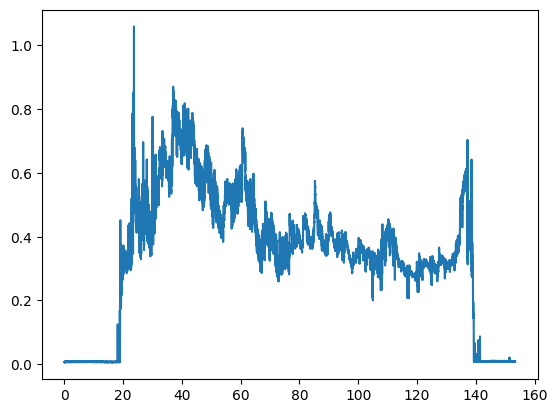

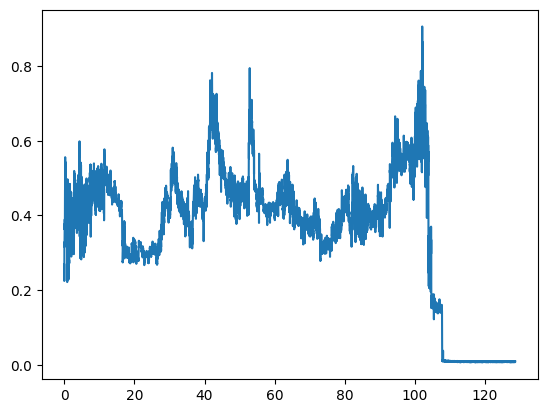

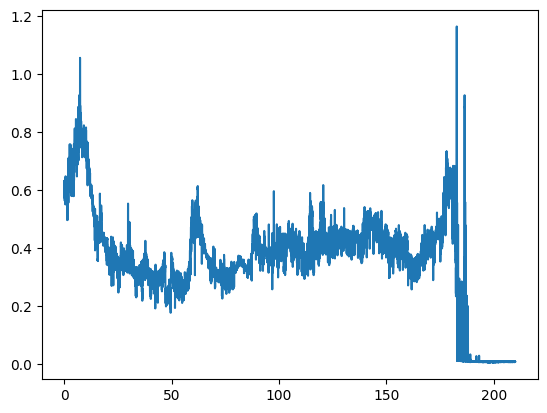

In [183]:

def plot_SC_exams(eda_samples, students, exam, feautre_index):
    
    #get lengths of exams for all students
    eda_lengths = []
    for student in students.values():
        X = student[exam]
        X_EDA=X[feautre_index]
        
        eda_lengths.append(len(X_EDA))
        
    ending = min(eda_lengths)
    start = max(eda_samples[exam])
    
    eda_points_list = [0] * (ending-start)
    for student in students.values():
        X = student[exam]
        X_EDA=X[feautre_index]
        X_EDA=X_EDA.iloc[start:ending]
        for j, value in enumerate(X_EDA.values):
            eda_points_list[j]+=value
    mean_sc = [val/10 for val in eda_points_list]
    x = np.arange(0,ending-start,1)
    x= x/60/4
    plt.plot(x, mean_sc)
    
    plt.show()
    
plot_SC_exams(eda_samples, students, 'Midterm 1',2)
plot_SC_exams(eda_samples, students, 'Midterm 2',2)
plot_SC_exams(eda_samples, students, 'Final',2)


In [152]:
grades = {'Midterm 1':
    {
        "S1": 78,
        "S2": 82,
        "S3": 77,
        "S4": 75,
        "S5": 67,
        "S6": 71,
        "S7": 64,
        "S8": 92,
        "S9": 80,
        "S10": 89
    }
,
'Midterm 2':
    {
        "S1": 82,
        "S2": 85,
        "S3": 90,
        "S4": 77,
        "S5": 77,
        "S6": 64,
        "S7": 33,
        "S8": 88,
        "S9": 39,
        "S10": 64,
    }
,
'Final':
    {
        "S1": 182,
        "S2": 180,
        "S3": 188,
        "S4": 149,
        "S5": 157,
        "S6": 175,
        "S7": 110,
        "S8": 184,
        "S9": 126,
        "S10": 116,
    }
}


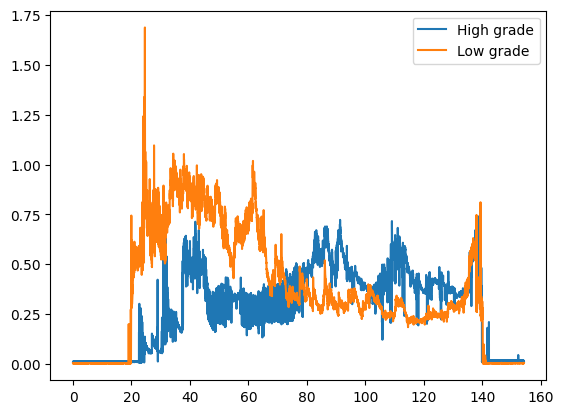

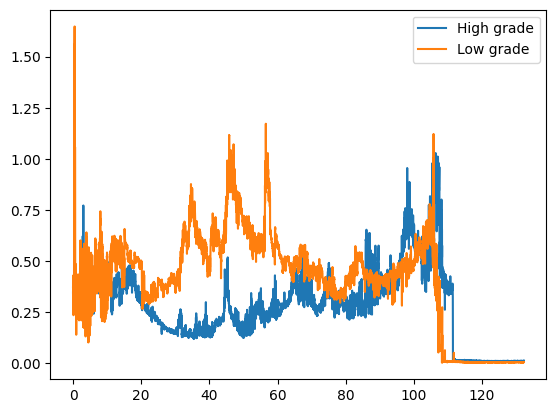

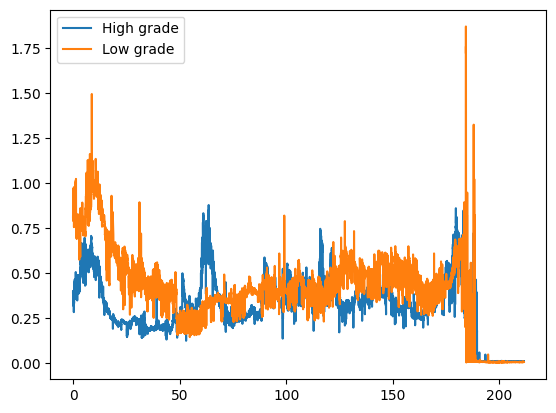

In [186]:


def plot_SC_exams_wGR(eda_samples, students, exam, grades, feautre_index):
    eda_lengths = []
    higher_grade_students = []
    lower_grade_students = []
    hg_removable_eda = []
    lg_removable_eda =[]
    for student,e in grades[exam].items():
        br=0
        if (exam != "Final" and e >= 80) or (exam == "Final" and e >= 160):
            higher_grade_students.append(student)
            hg_removable_eda.append(eda_samples[exam][br])
            X_EDA=students[student][exam][feautre_index]
            eda_lengths.append(len(X_EDA))
        else:
            lower_grade_students.append(student)
            lg_removable_eda.append(eda_samples[exam][br])
            X_EDA=students[student][exam][feautre_index]
            eda_lengths.append(len(X_EDA))
            
        br+=1
    
    ending = min(eda_lengths)
    start = max(hg_removable_eda)
    
    eda_points_list = [0] * (ending-start)
    for student in higher_grade_students:
        X_EDA=students[student][exam][feautre_index][start:ending]
        for j, value in enumerate(X_EDA.values):
            eda_points_list[j]+=value
    mean_sc = [val/len(hg_removable_eda) for val in eda_points_list]
    x = np.arange(0,ending-start,1)
    x= x/60/4
    plt.plot(x, mean_sc, label="High grade")
    
    start = max(lg_removable_eda)
    eda_points_list = [0] * (ending-start)
    for student in lower_grade_students:
        X_EDA=students[student][exam][feautre_index][start:ending]
        for j, value in enumerate(X_EDA.values):
            eda_points_list[j]+=value
    mean_sc = [val/len(lg_removable_eda) for val in eda_points_list]
    x = np.arange(0,ending-start,1)
    x= x/60/4
    plt.plot(x, mean_sc, label="Low grade")
    plt.legend()
    plt.show()
    
plot_SC_exams_wGR(eda_samples, students, 'Midterm 1', grades, 2)
plot_SC_exams_wGR(eda_samples, students, 'Midterm 2', grades, 2)
plot_SC_exams_wGR(eda_samples, students, 'Final', grades, 2)

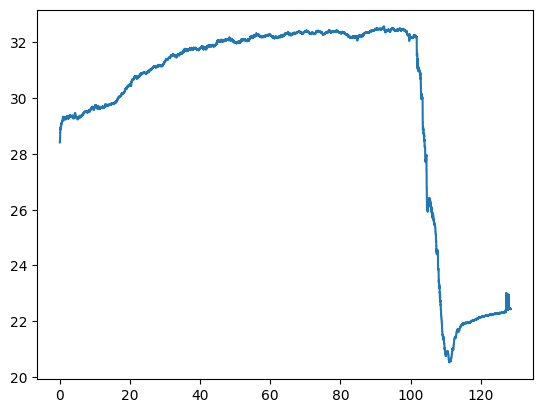

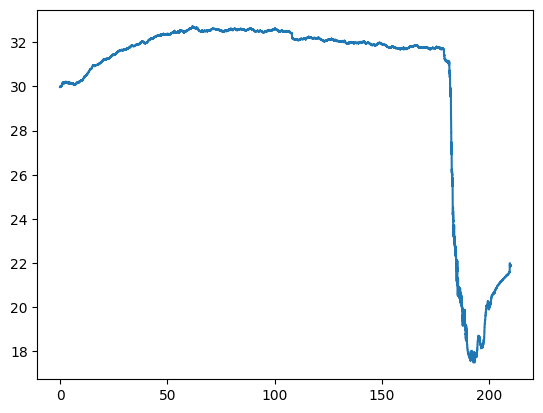

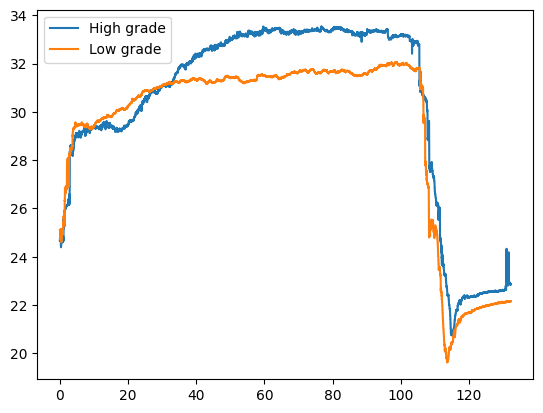

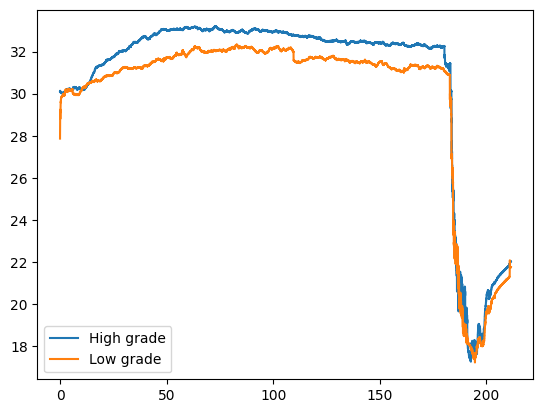

In [188]:

plot_SC_exams(eda_samples, students, 'Midterm 2',5)
plot_SC_exams(eda_samples, students, 'Final',5)

plot_SC_exams_wGR(eda_samples, students, 'Midterm 2', grades, 5)
plot_SC_exams_wGR(eda_samples, students, 'Final', grades, 5)

In [191]:
#LABEL ENGINEERING
def label_engineering(points_data):
    y = []
    for el in points_data:
        if(points_data[el] >= 80):
            y.append(1)
        else:
            y.append(0)
    #print(pd.DataFrame(y))
    return pd.DataFrame(y)

midterm1_y = label_engineering(grades['Midterm 1'])
midterm2_y = label_engineering(grades['Midterm 2'])
final_y = label_engineering(grades['Final'])         

In [204]:
#KNN algoritam za klasifikaciju
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def KNN_for_specific_data(dataframe, y):
    kf = KFold(n_splits=10)
    dataframe= pd.DataFrame(dataframe)
    
    score = []
    for i, (train_index, test_index) in enumerate(kf.split(dataframe)):
        # print(f"Fold {i}:")
        # print(f"  Train: index={train_index}")
        # print(f"  Test:  index={test_index}")
        
        x_train = dataframe.loc[train_index]
        x_test = dataframe.loc[test_index]
        y_train = y.loc[train_index]
        y_test = y.loc[test_index]
    
        neigh = KNeighborsClassifier(n_neighbors=3).fit(np.array(x_train), np.array(y_train))
        #neigh = SVC(kernel='poly').fit(np.array(x_train), np.array(y_train))
        score.append(neigh.score(x_test, y_test))
    return (score.count(1.0)/len(score)) * 100

print(f"Točnost za Midterm 1 (5 min): {KNN_for_specific_data(features['Midterm 1'][5], midterm1_y)} %")
print(f"Točnost za Midterm 1 (15 min): {KNN_for_specific_data(features['Midterm 1'][15], midterm1_y)} %")

print(f"Točnost za Midterm 2 (5 min): {KNN_for_specific_data(features['Midterm 2'][5], midterm2_y)} %")
print(f"Točnost za Midterm 2 (15 min): {KNN_for_specific_data(features['Midterm 2'][15], midterm2_y)} %")

print(f"Točnost za Final (5 min): {KNN_for_specific_data(features['Final'][5], final_y)} %")
print(f"Točnost za Final (15 min): {KNN_for_specific_data(features['Final'][15], final_y)} %")

C:\Users\otkup\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\otkup\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\otkup\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\otkup\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: 

Točnost za Midterm 1 (5 min): 60.0 %
Točnost za Midterm 1 (15 min): 60.0 %
Točnost za Midterm 2 (5 min): 50.0 %
Točnost za Midterm 2 (15 min): 50.0 %
Točnost za Final (5 min): 100.0 %
Točnost za Final (15 min): 100.0 %


C:\Users\otkup\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\otkup\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\otkup\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\otkup\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: 